In [15]:
import warnings 
warnings.filterwarnings('ignore')

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import torchsummary


from trainer import Trainer 
from tester import Tester
from utils import  visualize_data,show_misclassified_images,plot_class_distribution,plot_confusion_matrix,plot_curves
from dataloader import Cifar10DataLoader
from vistransformers import train_transforms,test_transforms
from model import Net,Network

In [17]:
torch.cuda.amp.autocast(enabled=True,dtype=torch.float16)
torch.set_float32_matmul_precision('medium')

In [18]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Is CUDA available? ", use_cuda)

Is CUDA available?  True


In [19]:
cifar10 = Cifar10DataLoader(is_cuda_available=use_cuda)

train_loader = cifar10.get_loader(transforms=train_transforms,train=True)
test_loader  = cifar10.get_loader(transforms=test_transforms,train=False) 

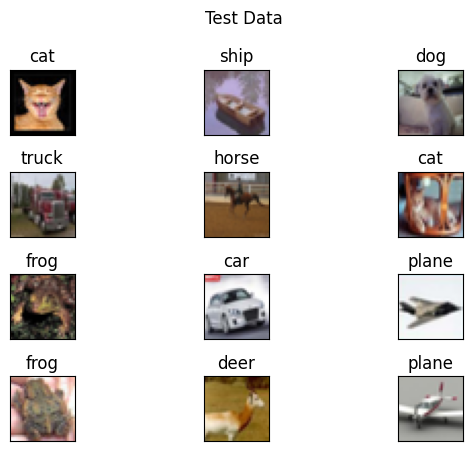

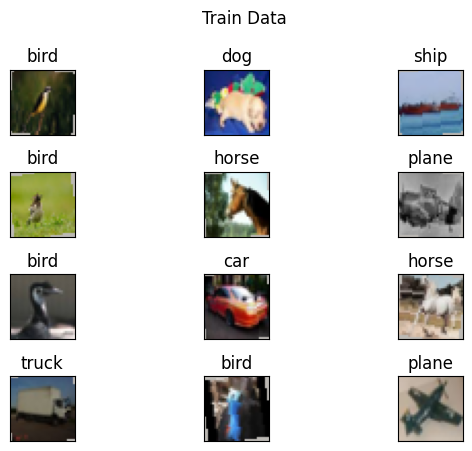

In [20]:
visualize_data(test_loader,12,"Test Data",classes=cifar10.classes)
visualize_data(train_loader,12,"Train Data",classes=cifar10.classes)

In [21]:
model = Network('group')
torchsummary.summary(model=model.cuda(),input_size=(3,32,32),batch_size=-1,device='cuda')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
         GroupNorm-3           [-1, 16, 32, 32]              32
         Dropout2d-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           2,304
              ReLU-6           [-1, 16, 32, 32]               0
         GroupNorm-7           [-1, 16, 32, 32]              32
         Dropout2d-8           [-1, 16, 32, 32]               0
            Conv2d-9           [-1, 10, 32, 32]             160
        MaxPool2d-10           [-1, 10, 16, 16]               0
           Conv2d-11           [-1, 16, 16, 16]           1,440
             ReLU-12           [-1, 16, 16, 16]               0
        GroupNorm-13           [-1, 16, 16, 16]              32
        Dropout2d-14           [-1, 16,

EPOCH=1| LR=0.200000| LOSS=1.51| BATCH=390| ACCURACY=30.618: 100%|██████████| 391/391 [00:21<00:00, 18.40it/s]
LOSS=130.67| BATCH=78| ACCURACY=38.450: 100%|██████████| 79/79 [00:07<00:00, 11.03it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=2| LR=0.200000| LOSS=1.39| BATCH=390| ACCURACY=41.390: 100%|██████████| 391/391 [00:24<00:00, 16.10it/s]
LOSS=114.19| BATCH=78| ACCURACY=46.310: 100%|██████████| 79/79 [00:08<00:00,  8.95it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=3| LR=0.200000| LOSS=1.43| BATCH=390| ACCURACY=46.852: 100%|██████████| 391/391 [00:22<00:00, 17.29it/s]
LOSS=103.54| BATCH=78| ACCURACY=51.940: 100%|██████████| 79/79 [00:07<00:00, 10.93it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=4| LR=0.200000| LOSS=1.14| BATCH=390| ACCURACY=51.516: 100%|██████████| 391/391 [00:21<00:00, 18.35it/s]
LOSS=100.31| BATCH=78| ACCURACY=54.120: 100%|██████████| 79/79 [00:07<00:00, 10.94it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=5| LR=0.200000| LOSS=1.08| BATCH=390| ACCURACY=55.432: 100%|██████████| 391/391 [00:21<00:00, 18.39it/s]
LOSS=91.05| BATCH=78| ACCURACY=57.840: 100%|██████████| 79/79 [00:07<00:00, 11.11it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=6| LR=0.200000| LOSS=1.09| BATCH=390| ACCURACY=58.414: 100%|██████████| 391/391 [00:21<00:00, 18.28it/s]
LOSS=88.22| BATCH=78| ACCURACY=60.420: 100%|██████████| 79/79 [00:07<00:00, 11.00it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=7| LR=0.200000| LOSS=1.12| BATCH=390| ACCURACY=60.998: 100%|██████████| 391/391 [00:21<00:00, 18.33it/s]
LOSS=81.14| BATCH=78| ACCURACY=62.620: 100%|██████████| 79/79 [00:07<00:00, 11.03it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=8| LR=0.200000| LOSS=1.07| BATCH=390| ACCURACY=62.518: 100%|██████████| 391/391 [00:21<00:00, 18.29it/s]
LOSS=81.25| BATCH=78| ACCURACY=63.840: 100%|██████████| 79/79 [00:07<00:00, 11.04it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=9| LR=0.200000| LOSS=0.92| BATCH=390| ACCURACY=64.438: 100%|██████████| 391/391 [00:21<00:00, 18.27it/s]
LOSS=74.23| BATCH=78| ACCURACY=66.440: 100%|██████████| 79/79 [00:07<00:00, 11.05it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=10| LR=0.200000| LOSS=0.89| BATCH=390| ACCURACY=65.776: 100%|██████████| 391/391 [00:21<00:00, 18.47it/s]
LOSS=72.93| BATCH=78| ACCURACY=67.740: 100%|██████████| 79/79 [00:07<00:00, 11.11it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=11| LR=0.200000| LOSS=0.89| BATCH=390| ACCURACY=66.912: 100%|██████████| 391/391 [00:21<00:00, 18.61it/s]
LOSS=70.53| BATCH=78| ACCURACY=68.300: 100%|██████████| 79/79 [00:07<00:00, 11.13it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=12| LR=0.200000| LOSS=0.79| BATCH=390| ACCURACY=68.476: 100%|██████████| 391/391 [00:21<00:00, 18.27it/s]
LOSS=65.45| BATCH=78| ACCURACY=70.690: 100%|██████████| 79/79 [00:07<00:00, 11.19it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=13| LR=0.200000| LOSS=0.86| BATCH=390| ACCURACY=69.136: 100%|██████████| 391/391 [00:20<00:00, 18.66it/s]
LOSS=66.46| BATCH=78| ACCURACY=70.860: 100%|██████████| 79/79 [00:07<00:00, 11.25it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=14| LR=0.200000| LOSS=0.60| BATCH=390| ACCURACY=70.100: 100%|██████████| 391/391 [00:21<00:00, 18.58it/s]
LOSS=67.48| BATCH=78| ACCURACY=70.640: 100%|██████████| 79/79 [00:07<00:00, 11.21it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=15| LR=0.200000| LOSS=0.85| BATCH=390| ACCURACY=70.624: 100%|██████████| 391/391 [00:21<00:00, 18.32it/s]
LOSS=60.93| BATCH=78| ACCURACY=72.990: 100%|██████████| 79/79 [00:07<00:00, 10.59it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=16| LR=0.200000| LOSS=0.87| BATCH=390| ACCURACY=71.734: 100%|██████████| 391/391 [00:21<00:00, 18.20it/s]
LOSS=65.64| BATCH=78| ACCURACY=71.440: 100%|██████████| 79/79 [00:07<00:00, 11.04it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=17| LR=0.200000| LOSS=0.81| BATCH=390| ACCURACY=72.026: 100%|██████████| 391/391 [00:21<00:00, 18.48it/s]
LOSS=59.27| BATCH=78| ACCURACY=73.770: 100%|██████████| 79/79 [00:07<00:00, 11.14it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=18| LR=0.200000| LOSS=0.91| BATCH=390| ACCURACY=72.638: 100%|██████████| 391/391 [00:21<00:00, 18.25it/s]
LOSS=58.73| BATCH=78| ACCURACY=74.240: 100%|██████████| 79/79 [00:07<00:00, 11.17it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=19| LR=0.200000| LOSS=0.67| BATCH=390| ACCURACY=73.272: 100%|██████████| 391/391 [00:21<00:00, 18.57it/s]
LOSS=57.74| BATCH=78| ACCURACY=74.410: 100%|██████████| 79/79 [00:07<00:00, 11.12it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=20| LR=0.200000| LOSS=0.93| BATCH=390| ACCURACY=73.986: 100%|██████████| 391/391 [00:21<00:00, 18.10it/s]
LOSS=60.31| BATCH=78| ACCURACY=73.150: 100%|██████████| 79/79 [00:07<00:00, 10.93it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


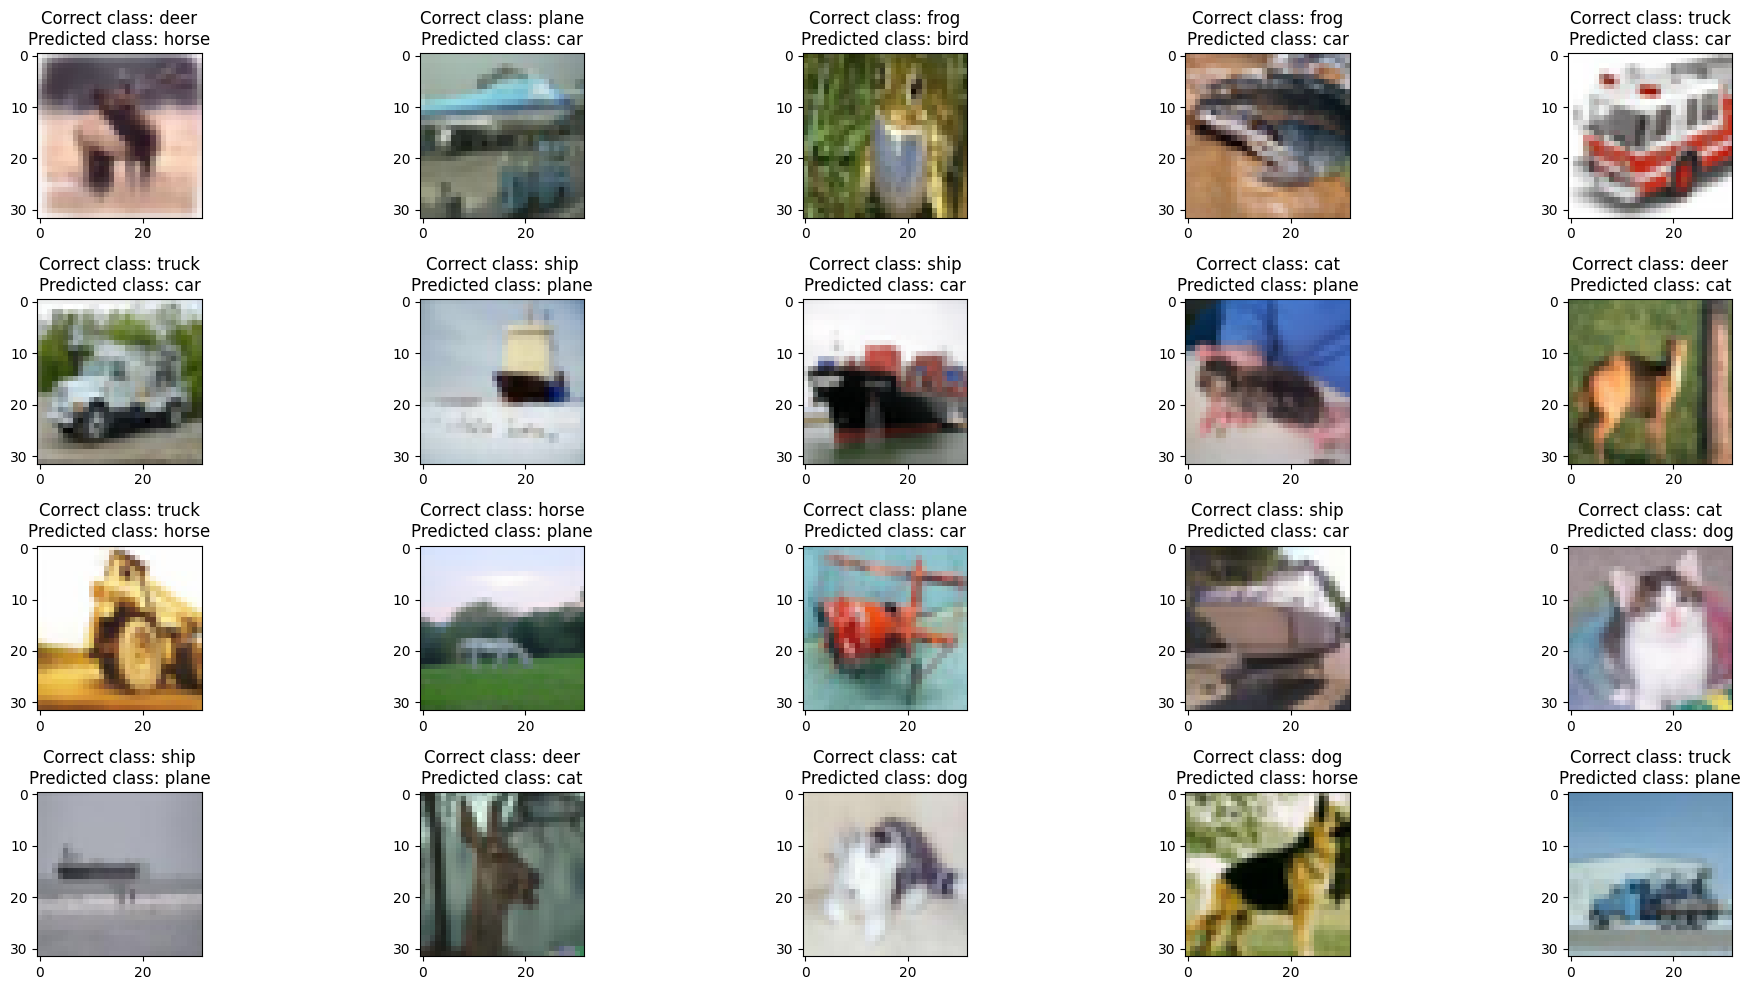

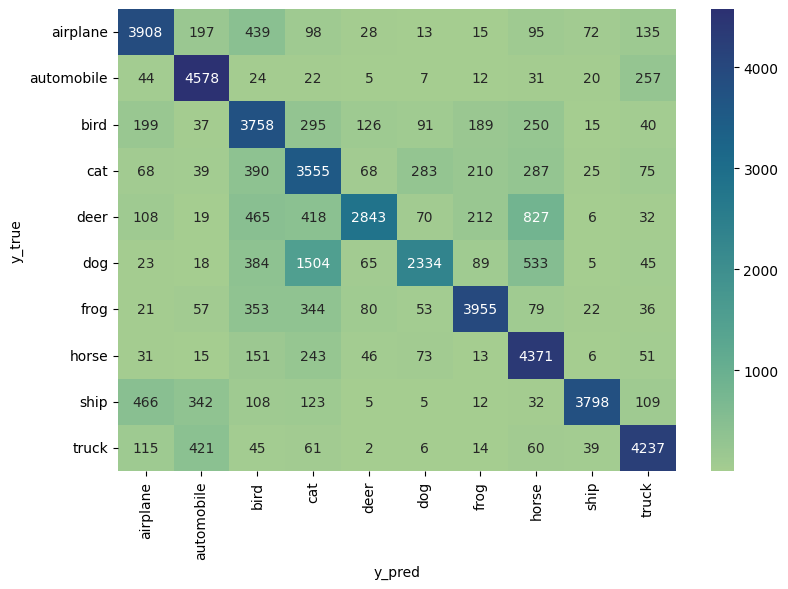

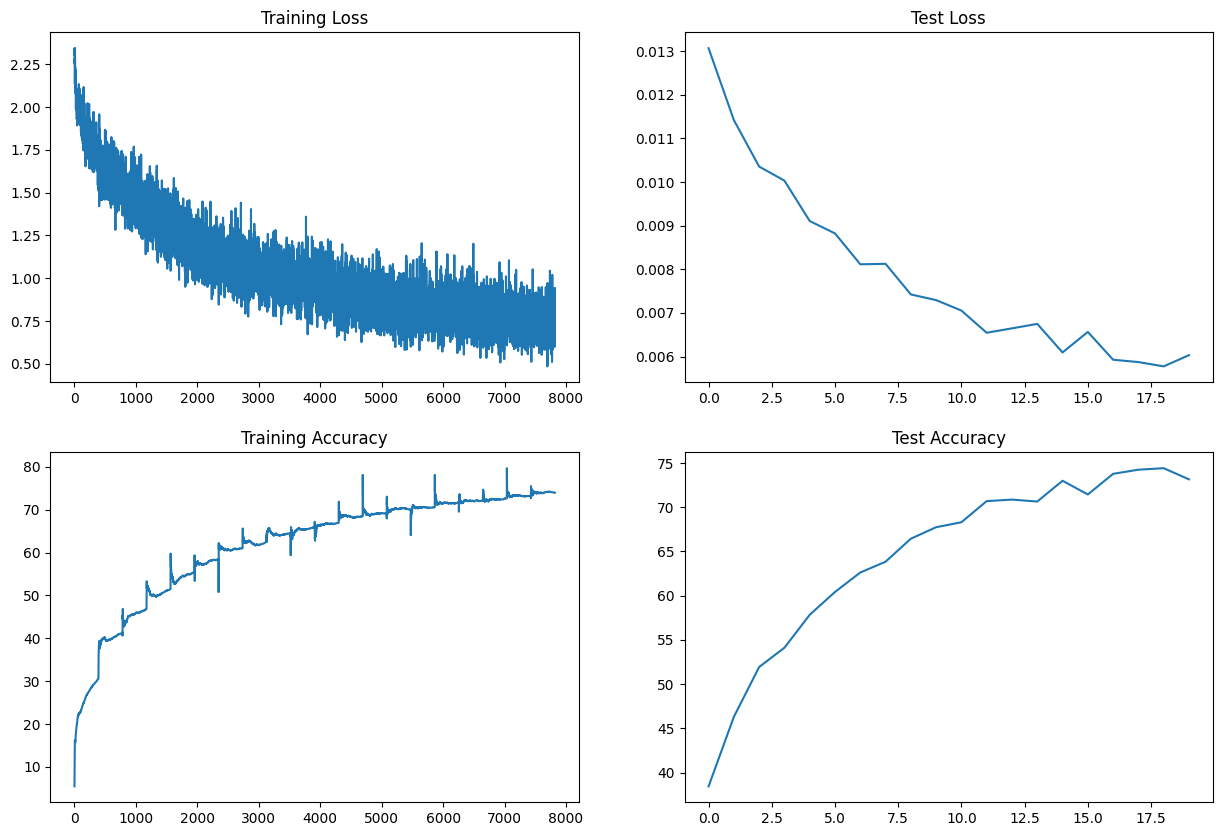

In [22]:
optimizer = optim.SGD(model.parameters(), lr=0.2, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,mode='min',factor=0.1,patience=5)
criterion = nn.NLLLoss()


trainer = Trainer(model, train_loader, optimizer, criterion, device)
tester = Tester(model, test_loader, criterion, device)

for epoch in range(1, 21):
    trainer.train(epoch=epoch)
    _,test_loss = tester.test()
    scheduler.step(test_loss)
    print('-'*200)


misclassified_images, predictions, labels = tester.get_misclassified_images()

show_misclassified_images(
    misclassified_images[:20],
    predictions[:20],
    labels[:20],
    cifar10.classes,
);

plot_confusion_matrix(model,train_loader,'cuda',train_loader.dataset.classes);

plot_curves(trainer.train_losses,trainer.train_accuracies,tester.test_losses,tester.test_accuracies);

In [23]:
torch.save(model.state_dict(),'./assets/BN/modelBN.pth')

In [24]:
torch.save(optimizer.state_dict(),'./assets/BN/optimBN.pth')